In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import seaborn as sns

In [2]:
data = pd.read_csv('final maybe.csv')

In [3]:
data

,Unnamed: 0,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,0,1,Less than 3 hours,Significantly decreased,I still find joy in my activities,I am frequently exhausted and struggle to get ...,I frequently feel like a failure and question ...,I focus easily and stay engaged,I am frequently overwhelmed by restlessness an...,Pretty much daily,Sleep like a baby,Angry almost every day,"Almost every day, out of nowhere",Always – I feel hopeless every day,I constantly feel uneasy or on edge,I frequently feel completely exhausted and inc...,Moderate Depression
1,1,2,3–5 hours,Significantly increased,I feel completely disengaged and indifferent t...,I feel energized and capable most of the time,I generally feel confident and worthwhile,"Concentration is almost impossible, and I feel...",I feel calm and settled,Never,Barely sleep at all anymore,Very calm,Never happens,Almost never – I usually feel hopeful,I feel calm most of the time,I usually feel energized and motivated through...,Moderate Depression
2,2,3,More than 9 hours,Slightly decreased,I notice a dulling of interest sometimes,I sometimes feel drained but manage,I occasionally doubt myself,Distractions sometimes interfere with my focus,I sometimes feel restless or fidgety,Once in a blue moon,Occasionally toss and turn,A little irritated sometimes,"Rarely, maybe once or twice",Sometimes – I feel stuck now and then,"It happens, but not often","I sometimes feel a bit tired, but it doesn't a...",Severe Depression
3,3,4,Less than 3 hours,Significantly decreased,I still find joy in my activities,I am frequently exhausted and struggle to get ...,I frequently feel like a failure and question ...,I focus easily and stay engaged,I am frequently overwhelmed by restlessness an...,Pretty much daily,Sleep like a baby,Angry almost every day,"Almost every day, out of nowhere",Always – I feel hopeless every day,I constantly feel uneasy or on edge,I frequently feel completely exhausted and inc...,Moderate Depression
4,4,5,3–5 hours,Significantly increased,I feel completely disengaged and indifferent t...,I feel energized and capable most of the time,I generally feel confident and worthwhile,"Concentration is almost impossible, and I feel...",I feel calm and settled,Never,Barely sleep at all anymore,Very calm,Never happens,Almost never – I usually feel hopeful,I feel calm most of the time,I usually feel energized and motivated through...,Moderate Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,808,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,809,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,810,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,811,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>gotta clean this bruhh</h1>

In [4]:
data.isna().sum()

Unnamed: 0             0
Number                 0
Sleep                290
Appetite             273
Interest             273
Fatigue              290
Worthlessness        290
Concentration        273
Agitation            290
Suicidal Ideation    290
Sleep Disturbance    273
Aggression           290
Panic Attacks        290
Hopelessness         290
Restlessness         290
Low Energy           288
Depression State     273
dtype: int64

In [5]:
print("Total number of entries:", data.shape[0])


Total number of entries: 813


In [6]:
data.columns = data.columns.str.strip()  
data = data.drop('Number', axis=1)       
data = data.drop('Unnamed: 0', axis=1) 
print(data.columns)


Index(['Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')


In [7]:
print("Total number of entries:", data.shape[0])



Total number of entries: 813


In [8]:
# Step 1: Find fully empty rows
empty_rows = data[data.isnull().all(axis=1)]

# Step 2: Print how many there are
print("Number of fully empty rows:", empty_rows.shape[0])


Number of fully empty rows: 273


In [9]:
data = data.dropna(how='all')


In [10]:
data.tail()

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
535,3–5 hours,Significantly increased,I feel completely disengaged and indifferent t...,I feel energized and capable most of the time,I generally feel confident and worthwhile,"Concentration is almost impossible, and I feel...",I feel calm and settled,Never,Barely sleep at all anymore,Very calm,Never happens,Almost never – I usually feel hopeful,I feel calm most of the time,I frequently feel completely exhausted and inc...,Mild Depression
536,More than 9 hours,Slightly decreased,I notice a dulling of interest sometimes,I sometimes feel drained but manage,I occasionally doubt myself,Distractions sometimes interfere with my focus,I sometimes feel restless or fidgety,Once in a blue moon,Occasionally toss and turn,A little irritated sometimes,"Rarely, maybe once or twice",Sometimes – I feel stuck now and then,"It happens, but not often",I usually feel energized and motivated through...,Severe Depression
537,Less than 3 hours,Significantly decreased,I still find joy in my activities,I am frequently exhausted and struggle to get ...,I frequently feel like a failure and question ...,I focus easily and stay engaged,I am frequently overwhelmed by restlessness an...,Pretty much daily,Sleep like a baby,Angry almost every day,"Almost every day, out of nowhere",Always – I feel hopeless every day,I constantly feel uneasy or on edge,"I sometimes feel a bit tired, but it doesn't a...",Moderate Depression
538,3–5 hours,Significantly increased,I feel completely disengaged and indifferent t...,I feel energized and capable most of the time,I generally feel confident and worthwhile,"Concentration is almost impossible, and I feel...",I feel calm and settled,Never,Barely sleep at all anymore,Very calm,Never happens,Almost never – I usually feel hopeful,I feel calm most of the time,I usually feel energized and motivated through...,Moderate Depression
539,More than 9 hours,Slightly decreased,I notice a dulling of interest sometimes,I sometimes feel drained but manage,I occasionally doubt myself,Distractions sometimes interfere with my focus,I sometimes feel restless or fidgety,Once in a blue moon,Occasionally toss and turn,A little irritated sometimes,"Rarely, maybe once or twice",Sometimes – I feel stuck now and then,"It happens, but not often","I sometimes feel a bit tired, but it doesn't a...",Severe Depression


In [11]:
print(data.isnull().sum())


Sleep                17
Appetite              0
Interest              0
Fatigue              17
Worthlessness        17
Concentration         0
Agitation            17
Suicidal Ideation    17
Sleep Disturbance     0
Aggression           17
Panic Attacks        17
Hopelessness         17
Restlessness         17
Low Energy           15
Depression State      0
dtype: int64


In [12]:
import random
import pandas as pd

# All your mappings, stored together
mappings = {
    "Sleep": [
        "Less than 3 hours",
        "3–5 hours",
        "5–7 hours",
        "7–9 hours",
        "More than 9 hours"
    ],
    "Appetite": [
        "Significantly decreased",
        "Slightly decreased",
        "No change",
        "Slightly increased",
        "Significantly increased"
    ],
    "Interest": [
        "I still find joy in my activities",
        "I notice a dulling of interest sometimes",
        "Lately, I’ve been feeling disconnected from what I used to enjoy",
        "I rarely feel motivated or interested anymore",
        "I feel completely disengaged and indifferent to my activities"
    ],
    "Fatigue": [
        "I feel energized and capable most of the time",
        "I sometimes feel drained but manage",
        "Lately, fatigue has been a persistent challenge for me",
        "I often feel overwhelmed by exhaustion",
        "I am frequently exhausted and struggle to get through the day"
    ],
    "Worthlessness": [
        "I generally feel confident and worthwhile",
        "I occasionally doubt myself",
        "Lately, negative feelings about myself have increased",
        "I often struggle with feelings of worthlessness",
        "I frequently feel like a failure and question my worth"
    ],
    "Concentration": [
        "I focus easily and stay engaged",
        "Distractions sometimes interfere with my focus",
        "Lately, maintaining concentration has been challenging",
        "I often feel overwhelmed and unable to focus",
        "Concentration is almost impossible, and I feel overwhelmed"
    ],
    "Agitation": [
        "I feel calm and settled",
        "I sometimes feel restless or fidgety",
        "Lately, I’ve been feeling more restless than usual",
        "I often feel anxious, restless, or unable to stay still",
        "I am frequently overwhelmed by restlessness and agitation"
    ],
    "Suicidal Ideation": [
        "Never",
        "Once in a blue moon",
        "Every now and then",
        "Almost every week",
        "Pretty much daily"
    ],
    "Sleep Disturbance": [
        "Sleep like a baby",
        "Occasionally toss and turn",
        "Restless some nights",
        "Almost every night is a struggle",
        "Barely sleep at all anymore"
    ],
    "Aggression": [
        "Very calm",
        "A little irritated sometimes",
        "Get angry once in a while",
        "Feel angry quite often",
        "Angry almost every day"
    ],
    "Panic Attacks": [
        "Never happens",
        "Rarely, maybe once or twice",
        "Sometimes, depends on the day",
        "Often, it catches me off guard",
        "Almost every day, out of nowhere"
    ],
    "Hopelessness": [
        "Almost never – I usually feel hopeful",
        "Sometimes – I feel stuck now and then",
        "Often – I lose hope quite a bit",
        "Most of the time – I feel things won’t improve",
        "Always – I feel hopeless every day"
    ],
    "Restlessness": [
        "I feel calm most of the time",
        "It happens, but not often",
        "I do notice it from time to time",
        "find it hard to stay still or feel settled",
        "I constantly feel uneasy or on edge"
    ],
    "Low Energy": [
        "I usually feel energized and motivated throughout the day",
        "I sometimes feel a bit tired, but it doesn't affect me much",
        "Lately, I’ve been feeling noticeably drained and sluggish",
        "I often struggle with low energy, making daily activities difficult",
        "I frequently feel completely exhausted and incapable of doing what I need to"
    ]
}

# Function to fill NaNs in each column with random choices from mapping
for column, values in mappings.items():
    if column in data.columns:
        data[column] = data[column].apply(
            lambda x: random.choice(values) if pd.isnull(x) else x
        )


In [13]:
print(data.isnull().sum())


Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64


<h1>alright so now as the data is clean , we will begin with encoding , since all the data is ordinal</h1>

In [14]:


# # Create a dictionary to hold encoders for each column
# encoders = {}
# encoded_data = data.copy()

# # Apply LabelEncoder to every column
# for column in encoded_data.columns:
#     l = LabelEncoder()
#     encoded_data[column] = l.fit_transform(encoded_data[column])
#     encoders[column] = l # Save the encoder for later decoding


In [15]:
# data["Total_Score"] = encoded_data.sum(axis=1)
# def classify_depression(score):
#     if score <= 14:
#         return 'No Depression'
#     elif score <= 24:
#         return 'Mild Depression'
#     elif score <= 34:
#         return 'Moderate Depression'
#     elif score <= 44:
#         return 'Severe Depression'
#     else:
#         return 'Extremely Severe'

# data["Depression State"] = data["Total_Score"].apply(classify_depression)


In [16]:
data.head()

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,Less than 3 hours,Significantly decreased,I still find joy in my activities,I am frequently exhausted and struggle to get ...,I frequently feel like a failure and question ...,I focus easily and stay engaged,I am frequently overwhelmed by restlessness an...,Pretty much daily,Sleep like a baby,Angry almost every day,"Almost every day, out of nowhere",Always – I feel hopeless every day,I constantly feel uneasy or on edge,I frequently feel completely exhausted and inc...,Moderate Depression
1,3–5 hours,Significantly increased,I feel completely disengaged and indifferent t...,I feel energized and capable most of the time,I generally feel confident and worthwhile,"Concentration is almost impossible, and I feel...",I feel calm and settled,Never,Barely sleep at all anymore,Very calm,Never happens,Almost never – I usually feel hopeful,I feel calm most of the time,I usually feel energized and motivated through...,Moderate Depression
2,More than 9 hours,Slightly decreased,I notice a dulling of interest sometimes,I sometimes feel drained but manage,I occasionally doubt myself,Distractions sometimes interfere with my focus,I sometimes feel restless or fidgety,Once in a blue moon,Occasionally toss and turn,A little irritated sometimes,"Rarely, maybe once or twice",Sometimes – I feel stuck now and then,"It happens, but not often","I sometimes feel a bit tired, but it doesn't a...",Severe Depression
3,Less than 3 hours,Significantly decreased,I still find joy in my activities,I am frequently exhausted and struggle to get ...,I frequently feel like a failure and question ...,I focus easily and stay engaged,I am frequently overwhelmed by restlessness an...,Pretty much daily,Sleep like a baby,Angry almost every day,"Almost every day, out of nowhere",Always – I feel hopeless every day,I constantly feel uneasy or on edge,I frequently feel completely exhausted and inc...,Moderate Depression
4,3–5 hours,Significantly increased,I feel completely disengaged and indifferent t...,I feel energized and capable most of the time,I generally feel confident and worthwhile,"Concentration is almost impossible, and I feel...",I feel calm and settled,Never,Barely sleep at all anymore,Very calm,Never happens,Almost never – I usually feel hopeful,I feel calm most of the time,I usually feel energized and motivated through...,Moderate Depression


In [17]:


# Create a dictionary to hold encoders for each column
New = {}
new_data = data.copy()

# Apply LabelEncoder to every column
for column in new_data.columns:
    le = LabelEncoder()
    new_data[column] = le.fit_transform(new_data[column])
    New[column] = le  # Save the encoder for later decoding


In [18]:
new_data.head()

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,3,1,3,0,0,2,0,4,4,1,0,1,0,0,2
1,0,2,0,1,1,0,1,2,1,4,1,0,2,3,2
2,4,3,1,3,2,1,3,3,2,0,3,4,3,2,3
3,3,1,3,0,0,2,0,4,4,1,0,1,0,0,2
4,0,2,0,1,1,0,1,2,1,4,1,0,2,3,2


In [19]:
# X = all columns except target
X = new_data.drop('Depression State', axis=1)

# y = the target column
y = data['Depression State']

# Encode y
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [21]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("📊 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Feature Importance
print("\n🌲 Feature Importance (Random Forest):")
importances = rf_model.feature_importances_
for name, score in zip(X.columns, importances):
    print(f"{name}: {score * 100:.3f}%")



log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("\n📊 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))

📊 Random Forest Results:
Accuracy: 0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.77      0.50      0.61        34
           2       0.78      0.90      0.84        69
           3       0.96      1.00      0.98        53

    accuracy                           0.85       162
   macro avg       0.88      0.85      0.86       162
weighted avg       0.85      0.85      0.84       162


🌲 Feature Importance (Random Forest):
Sleep: 3.443%
Appetite: 10.795%
Interest: 8.093%
Fatigue: 6.414%
Worthlessness: 11.201%
Concentration: 11.949%
Agitation: 8.554%
Suicidal Ideation: 1.697%
Sleep Disturbance: 4.312%
Aggression: 3.232%
Panic Attacks: 5.180%
Hopelessness: 7.753%
Restlessness: 6.064%
Low Energy: 11.314%

📊 Logistic Regression Results:
Accuracy: 0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1      

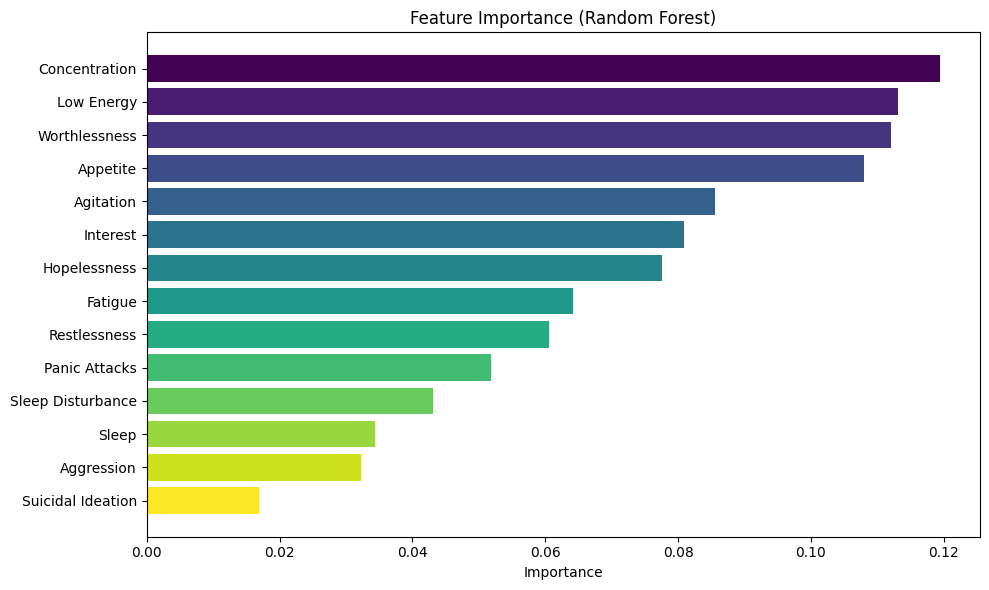

In [22]:
# Get feature importances directly from the model
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for easy sorting and plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Optional: puts most important on top
plt.tight_layout()
plt.show()

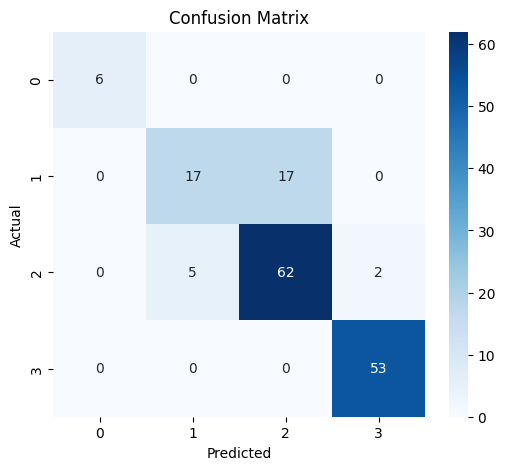

In [23]:


y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


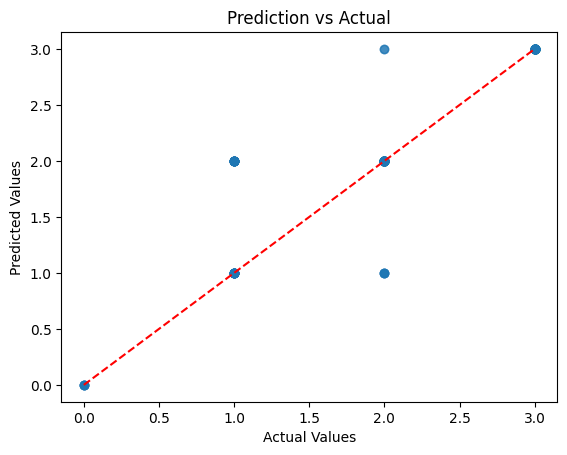

In [24]:
y_pred = rf_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual')
plt.show()

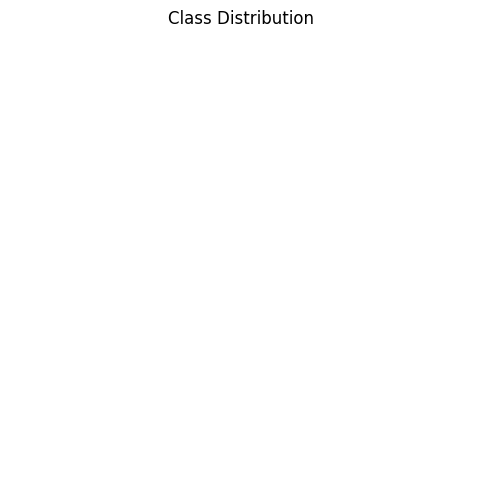

In [25]:
label_map = {0: "No Depression", 1: "Mild", 2: "Moderate", 3: "Severe"}
y_named = y.map(label_map)

y_named.value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


In [26]:
import pickle

with open('rf_model_and_encoders.pkl', 'wb') as f:
    pickle.dump({
        'model': rf_model,
        'feature_encoders': New,
        'target_encoder': target_encoder
    }, f)


In [27]:
import pickle

with open('log_model_and_encoders.pkl', 'wb') as f:
    pickle.dump({
        'model': log_model,
        'feature_encoders': New,
        'target_encoder': target_encoder
    }, f)
